In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from torch import nn
from tqdm import tqdm

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.from_numpy(y_np)

In [4]:
model = nn.Linear(1,1)
loss_fn = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2) #adjust the learning rate in the optimizer such that loss is minimum

In [5]:
for i in tqdm(range(10000)):
    optim.zero_grad() # Always start optimizer with zero gradients
    outputs = model(X) #get the output from the model
    loss = loss_fn(outputs, y) # calculate the loss
    if i % 5000 == 0:
        print(loss.item())
    loss.backward()
    optim.step()

  0%|                            | 0/10000 [00:00<?, ?it/s]

461.3658447265625


 52%|███████▋       | 5166/10000 [00:04<00:03, 1567.82it/s]

8.697588920593262


100%|██████████████| 10000/10000 [00:07<00:00, 1341.54it/s]


In [6]:
with torch.no_grad():
    y_preds = model(X).numpy().flatten()

In [7]:
print(y_preds)

[23.282314 21.91956  24.885551 20.102554 18.900126 18.793242 18.205389
 20.236156 20.449923 18.900126 18.900126 15.533321 17.350327 17.08312
  9.227247  8.297371  8.719557 25.526848 28.653164 27.477455 24.110653
 18.472595 18.926846 16.762472 16.735752 26.943043 25.847496 29.198265
 20.34304  22.480694 18.205389 22.427252]


<Axes: >

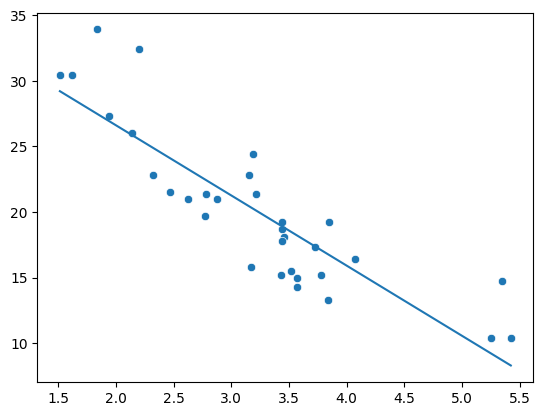

In [8]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_preds)

### Similarly we can load the dataset with torch.utils.data and make a dataloader to train dataset in batches instead of training complete data

In [9]:
from torch.utils.data import Dataset, DataLoader

In [10]:
class car_data(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [11]:
train_loader = DataLoader(dataset=car_data(X_np, y_np), batch_size=32)

In [12]:
model = nn.Linear(1,1)
loss_fn = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-2) #adjust the learning rate in the optimizer such that loss is minimum

In [13]:
for i in tqdm(range(10000)):
    for X, y in train_loader:
        optim.zero_grad() # Always start optimizer with zero gradients
        outputs = model(X) #get the output from the model
        loss = loss_fn(outputs, y) # calculate the loss
        if i % 5000 == 0:
            print(loss.item())
        loss.backward()
        optim.step()

  1%|                  | 57/10000 [00:00<00:17, 564.36it/s]

579.4573974609375


 50%|████████        | 5050/10000 [00:08<00:08, 615.56it/s]

8.697588920593262


100%|███████████████| 10000/10000 [00:16<00:00, 593.02it/s]


In [14]:
with torch.no_grad():
    y_preds = model(X).numpy().flatten()

<Axes: >

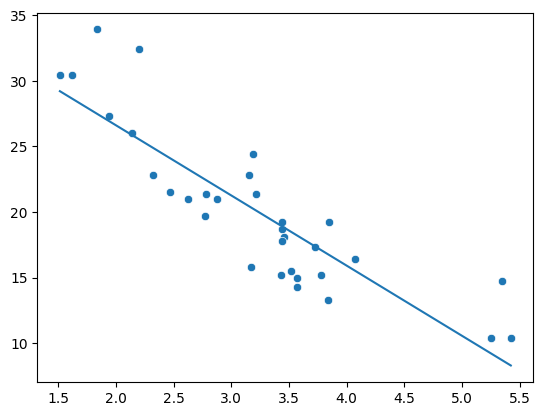

In [15]:
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_preds)